**Firas Obeid - LSTM Personal Notes**
  
We can specify devices for storage and calculation, such as the CPU or GPU. By default, data are created in the main memory and then use the CPU for calculations.

The deep learning framework requires all input data for calculation to be on the same device, be it CPU or the same GPU.

You can lose significant performance by moving data without care. A typical mistake is as follows: computing the loss for every minibatch on the GPU and reporting it back to the user on the command line (or logging it in a NumPy ndarray) will trigger a global interpreter lock which stalls all GPUs. It is much better to allocate memory for logging inside the GPU and only move larger logs.

-  for Tensorflow-2: You can just use LSTM with no activation specified (ied default to tanh) function and it will automatically use the CuDNN version
- Gradient clipping is a technique to prevent exploding gradients in very deep networks, usually in recurrent neural networks. ... This prevents any gradient to have norm greater than the threshold and thus the gradients are clipped.

### Tips for Activation Functions:
- When using the ReLU function for hidden layers, it is a good practice to use a “He Normal” or “He Uniform” weight initialization and scale input data to the range 0-1 (normalize) prior to training.
- When using the Sigmoid function for hidden layers, it is a good practice to use a “Xavier Normal” or “Xavier Uniform” weight initialization (also referred to Glorot initialization, named for Xavier Glorot) and scale input data to the range 0-1 (e.g. the range of the activation function) prior to training.
- When using the TanH function for hidden layers, it is a good practice to use a “Xavier Normal” or “Xavier Uniform” weight initialization (also referred to Glorot initialization, named for Xavier Glorot) and scale input data to the range -1 to 1 (e.g. the range of the activation function) prior to training.

In [1]:
import tensorflow as tf
import numpy as np

ModuleNotFoundError: No module named 'tensorflow'

In [3]:
# Read in the text file with the read_file function.
def read_file(filepath):
    """
    Reads in a text file from the directory and saves the file contents to a variable.
    
    Args:
        text (str): The input text to read and save
        
    Returns: 
        A string containing the file contents.
    """
    with open(filepath) as f:
        str_text = f.read()
    return str_text

## Load Text

In [4]:
# Pass in the first four chapters of Moby Dick to the read_file function.
md_text = read_file('Resources/moby_dick_four_chapters.txt')

## Tokenization

In [5]:
tokens = md_text.split(' ') #split into tokens

In [6]:
print(tokens[:300])

['Call', 'me', 'Ishmael.', '', 'Some', 'years', 'ago--never', 'mind', 'how', 'long\nprecisely--having', 'little', 'or', 'no', 'money', 'in', 'my', 'purse,', 'and', 'nothing\nparticular', 'to', 'interest', 'me', 'on', 'shore,', 'I', 'thought', 'I', 'would', 'sail', 'about', 'a\nlittle', 'and', 'see', 'the', 'watery', 'part', 'of', 'the', 'world.', '', 'It', 'is', 'a', 'way', 'I', 'have', 'of\ndriving', 'off', 'the', 'spleen', 'and', 'regulating', 'the', 'circulation.', '', 'Whenever', 'I\nfind', 'myself', 'growing', 'grim', 'about', 'the', 'mouth;', 'whenever', 'it', 'is', 'a', 'damp,\ndrizzly', 'November', 'in', 'my', 'soul;', 'whenever', 'I', 'find', 'myself', 'involuntarily\npausing', 'before', 'coffin', 'warehouses,', 'and', 'bringing', 'up', 'the', 'rear', 'of', 'every\nfuneral', 'I', 'meet;', 'and', 'especially', 'whenever', 'my', 'hypos', 'get', 'such', 'an', 'upper\nhand', 'of', 'me,', 'that', 'it', 'requires', 'a', 'strong', 'moral', 'principle', 'to', 'prevent', 'me\nfrom', 'd

In [7]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [8]:
filter_out_punctuation = '\n\n \n\n\n!"-#$%&()--.*+,-/:;<=>?@[\\]^_`{|}~\t\n' #remove puncs and regexs

# Initialize the Keras Tokenizer class 
tokenizer = Tokenizer(filters = filter_out_punctuation, 
                      lower = True)
# Map each word with an index.
tokenizer.fit_on_texts(tokens)

In [9]:
tokenizer.texts_to_sequences(["call"]) #example

[[558]]

In [10]:
tokenizer.texts_to_sequences(["long\nprecisely--having"]) 

[[101, 559, 221]]

In [11]:
tokenizer.texts_to_sequences(["long"]) , tokenizer.texts_to_sequences(["precisely"]), tokenizer.texts_to_sequences(["having"])

([[101]], [[559]], [[221]])

In [12]:
# Get the dictionary of words and the number of times they appear in the text.
print(tokenizer.word_counts) 

OrderedDict([('call', 2), ('me', 96), ('ishmael', 6), ('some', 30), ('years', 4), ('ago', 4), ('never', 18), ('mind', 7), ('how', 13), ('long', 15), ('precisely', 2), ('having', 6), ('little', 30), ('or', 37), ('no', 40), ('money', 5), ('in', 219), ('my', 70), ('purse', 3), ('and', 372), ('nothing', 11), ('particular', 6), ('to', 250), ('interest', 1), ('on', 66), ('shore', 1), ('i', 271), ('thought', 26), ('would', 25), ('sail', 4), ('about', 39), ('a', 400), ('see', 17), ('the', 599), ('watery', 1), ('part', 9), ('of', 319), ('world', 8), ('it', 155), ('is', 75), ('way', 15), ('have', 31), ('driving', 1), ('off', 16), ('spleen', 1), ('regulating', 1), ('circulation', 1), ('whenever', 5), ('find', 3), ('myself', 16), ('growing', 1), ('grim', 1), ('mouth', 5), ('damp', 3), ('drizzly', 1), ('november', 1), ('soul', 3), ('involuntarily', 2), ('pausing', 2), ('before', 14), ('coffin', 5), ('warehouses', 2), ('bringing', 1), ('up', 48), ('rear', 1), ('every', 7), ('funeral', 1), ('meet', 1

In [13]:
index_to_word = {index: word for word, index in tokenizer.word_index.items()}

In [14]:
index_to_word

{1: 'the',
 2: 'a',
 3: 'and',
 4: 'of',
 5: 'i',
 6: 'to',
 7: 'in',
 8: 'it',
 9: 'that',
 10: 'his',
 11: 'he',
 12: 'was',
 13: 'but',
 14: 'me',
 15: 'with',
 16: 'as',
 17: 'this',
 18: 'at',
 19: 'you',
 20: 'is',
 21: 'all',
 22: 'my',
 23: 'for',
 24: 'on',
 25: 'be',
 26: 'from',
 27: 'not',
 28: 'there',
 29: 'one',
 30: 'up',
 31: 'what',
 32: 'him',
 33: 'so',
 34: 'bed',
 35: 'no',
 36: 'now',
 37: 'about',
 38: 'into',
 39: 'or',
 40: 'by',
 41: 'were',
 42: 'out',
 43: 'had',
 44: 'then',
 45: 'harpooneer',
 46: 'have',
 47: 'an',
 48: 'some',
 49: 'little',
 50: 'upon',
 51: 'like',
 52: 'old',
 53: 'if',
 54: 'they',
 55: 'over',
 56: 'landlord',
 57: 'thought',
 58: 'room',
 59: 'would',
 60: 'when',
 61: 'here',
 62: 'head',
 63: 'night',
 64: 'such',
 65: 'which',
 66: 'could',
 67: 'sea',
 68: 'though',
 69: 'time',
 70: 'do',
 71: 'man',
 72: 'said',
 73: 'very',
 74: 'go',
 75: 'these',
 76: 'more',
 77: 'did',
 78: 'first',
 79: 'sort',
 80: 'last',
 81: 'never

In [15]:
# Get the length of the tokens list.
dataset_size = tokenizer.document_count
dataset_size

10394

In [16]:
max_id = len(tokenizer.word_index) # number of distinct characters
max_id

2727

In [17]:
tokenizer.word_index

{'the': 1,
 'a': 2,
 'and': 3,
 'of': 4,
 'i': 5,
 'to': 6,
 'in': 7,
 'it': 8,
 'that': 9,
 'his': 10,
 'he': 11,
 'was': 12,
 'but': 13,
 'me': 14,
 'with': 15,
 'as': 16,
 'this': 17,
 'at': 18,
 'you': 19,
 'is': 20,
 'all': 21,
 'my': 22,
 'for': 23,
 'on': 24,
 'be': 25,
 'from': 26,
 'not': 27,
 'there': 28,
 'one': 29,
 'up': 30,
 'what': 31,
 'him': 32,
 'so': 33,
 'bed': 34,
 'no': 35,
 'now': 36,
 'about': 37,
 'into': 38,
 'or': 39,
 'by': 40,
 'were': 41,
 'out': 42,
 'had': 43,
 'then': 44,
 'harpooneer': 45,
 'have': 46,
 'an': 47,
 'some': 48,
 'little': 49,
 'upon': 50,
 'like': 51,
 'old': 52,
 'if': 53,
 'they': 54,
 'over': 55,
 'landlord': 56,
 'thought': 57,
 'room': 58,
 'would': 59,
 'when': 60,
 'here': 61,
 'head': 62,
 'night': 63,
 'such': 64,
 'which': 65,
 'could': 66,
 'sea': 67,
 'though': 68,
 'time': 69,
 'do': 70,
 'man': 71,
 'said': 72,
 'very': 73,
 'go': 74,
 'these': 75,
 'more': 76,
 'did': 77,
 'first': 78,
 'sort': 79,
 'last': 80,
 'never': 8

## Create Sequences of Tokens

In [18]:
encoded = np.array(tokenizer.texts_to_sequences([tokens])) - 1 #So that are token IDs start at 0 and not 1

In [19]:
encoded = encoded.flatten() #Make it 1D

In [20]:
train_size = len(tokens) * 90 // 100
#LOAD INTO A TENSOR OBJECT
dataset = tf.data.Dataset.from_tensor_slices(encoded[:train_size])

#LOAD INTO WINDOWS of size 26: this is a hyperparam
n_steps = 25
window_length = n_steps + 1 # target = input shifted 1 character ahead
dataset = dataset.window(window_length, shift=1, drop_remainder=True)

dataset = dataset.flat_map(lambda window: window.batch(window_length))


dataset = dataset.batch(128)
dataset = dataset.map(lambda windows: (windows[:, :-1], windows[:, 1:]))

dataset = dataset.prefetch(1)

dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None, None), dtype=tf.int32, name=None), TensorSpec(shape=(None, None), dtype=tf.int32, name=None))>

In [21]:
for x, y in dataset.take(1):  # change 5 to the number of examples you want to see  
    print("Input data: ", x.numpy()[0])  
    print("Input Text: ", tokenizer.sequences_to_texts(x.numpy())[0])  
    print("Output data: ", y.numpy()[0])  
    print("Output Text: ", tokenizer.sequences_to_texts([y.numpy()[0]]))  

Input data:  [557  13  47 314 193 118  48  38  34 261   6  21   2   5 967  13  23   4
  56   4  58 316  36   2  85]
Input Text:  civilized but an e fire door some into bed hat to all a i toilet but for of landlord of room ago now a been
Output data:  [ 13  47 314 193 118  48  38  34 261   6  21   2   5 967  13  23   4  56
   4  58 316  36   2  85   0]
Output Text:  ['but an e fire door some into bed hat to all a i toilet but for of landlord of room ago now a been']


In [22]:
for x, y in dataset.take(1):  # change 5 to the number of examples you want to see  
    print("Input Text: ", len(tokenizer.sequences_to_texts(x.numpy())))
    print("Input Text: ", tokenizer.sequences_to_texts(x.numpy()))

Input Text:  128
Input Text:  ['civilized but an e fire door some into bed hat to all a i toilet but for of landlord of room ago now a been', 'but an e fire door some into bed hat to all a i toilet but for of landlord of room ago now a been', 'an e fire door some into bed hat to all a i toilet but for of landlord of room ago now a been shore', 'e fire door some into bed hat to all a i toilet but for of landlord of room ago now a been shore tomahawk', 'fire door some into bed hat to all a i toilet but for of landlord of room ago now a been shore tomahawk and', 'door some into bed hat to all a i toilet but for of landlord of room ago now a been shore tomahawk and', 'some into bed hat to all a i toilet but for of landlord of room ago now a been shore tomahawk and in', 'into bed hat to all a i toilet but for of landlord of room ago now a been shore tomahawk and in you', 'bed hat to all a i toilet but for of landlord of room ago now a been shore tomahawk and in you the', 'hat to all a i toi

In [23]:
tokenizer.sequences_to_texts( [[557,  13,   47,314,193 ]])

['civilized but an e fire']

In [24]:
dataset_size

10394

## Creating a LSTM  Model

In [25]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

def configure_dataset(dataset):
  return dataset.cache().prefetch(buffer_size=AUTOTUNE)

train_seq_data = configure_dataset(dataset)

In [26]:
# Import the dependencies for LSTM model.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Embedding, TimeDistributed

In [27]:
def create_model(vocabulary_size):
    """
    Create and compile an LSTM-based sequential model for text generation.

    Parameters:
    - vocabulary_size (int): The size of the vocabulary, i.e., the number of unique words in the text.
    - seq_len (int): The length of the input sequences, indicating the number of words in each sequence.

    Returns:
    - model (Sequential): A compiled Keras sequential model for text generation.

    Model Architecture:
    - Embedding Layer: Maps word indices to dense vectors.
    - LSTM Layer 1: 256 units, returns full sequence.
    - LSTM Layer 2: 256 units.
    - TimeDistributed Dense Layer:  Dense layer at every time step. Keras offers a TimeDistributed layer for this very purpose:
                                    it wraps any layer (e.g., a Dense layer) and applies it at every time step of its
                                    input sequence. It does this efficiently, by reshaping the inputs so that each time step
                                    is treated as a separate instance (i.e., it reshapes the inputs from [batch size, time steps,
                                    input dimensions] to [batch size × time steps, input dimensions]. TimeDistributed(Dense(n)) layer
                                    is equivalent to a Conv1D(n, filter_size=1) layer.
                                    The Dense layer, thus, is applied independently at each time step and that the model will output 
                                    a sequence, not just a single vector.
    - Output Layer: Dense layer with softmax activation for multi-class classification.
    

    Compilation:
    - Loss: sparse_categorical_crossentropy If you have multiple classes and your labels are integers, sparse_categorical_crossentropy is the appropriate loss function to use. 
    - Optimizer: Adam.
    - Metrics: Accuracy.

    Usage Example:
    ```python
    model = create_model(vocabulary_size=10000, seq_len=25)
    ```
    """
    model = Sequential()
    model.add(Embedding(vocabulary_size, 2**6, input_shape=[None]))
    model.add(LSTM(256, return_sequences=True))  # To turn the model into a sequence-to-sequence model, we must set return_sequences=True in all recurrent layers (even the last one), and we must apply the output
    model.add(LSTM(256, return_sequences=True))
    # model.add(Dense(150, activation='relu'))

    model.add(TimeDistributed(Dense(vocabulary_size, activation='softmax')))
    # model.add(Dense(vocabulary_size, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    model.summary()
    
    return model

## Training the Model

In [30]:
import tensorflow as tf
import tensorflow.keras.backend as K

In [31]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only use some GPUs
    try:
        tf.config.experimental.set_visible_devices(gpus[0:2], 'GPU')
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPU,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
    # Visible devices must be set at program startup
        print(e)

1 Physical GPU, 1 Logical GPUs


In [32]:
# fix random seed for reproducibility
K.clear_session()
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

seq_len = n_steps
vocabulary_size = max_id
with tf.device('GPU'):
    # Define the model and the seq_len (25 words).
    model = create_model(max_id)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          174528    
                                                                 
 lstm (LSTM)                 (None, None, 256)         328704    
                                                                 
 lstm_1 (LSTM)               (None, None, 256)         525312    
                                                                 
 time_distributed (TimeDistr  (None, None, 2727)       700839    
 ibuted)                                                         
                                                                 
Total params: 1,729,383
Trainable params: 1,729,383
Non-trainable params: 0
_________________________________________________________________


In [31]:
from datetime import datetime
import time

In [32]:
time_start = datetime.now()
print(time_start)
start = time.time()
# Fit model with 300 epochs. (This will take ~60 min to complete.)
model.fit(train_seq_data, epochs=300,verbose=1) 

end = time.time()
time_send = datetime.now()
print(time_send)
print("Time took {:3.1f} min".format((end-start)/60))

2024-04-28 13:04:51.632888
Epoch 1/300
61/61 [==============================] - 6s 31ms/step - loss: 6.7979 - accuracy: 0.0524
Epoch 2/300
61/61 [==============================] - 1s 18ms/step - loss: 6.0886 - accuracy: 0.0602
Epoch 3/300
61/61 [==============================] - 1s 18ms/step - loss: 6.0158 - accuracy: 0.0617
Epoch 4/300
61/61 [==============================] - 1s 18ms/step - loss: 5.9899 - accuracy: 0.0617
Epoch 5/300
61/61 [==============================] - 1s 18ms/step - loss: 5.9769 - accuracy: 0.0617
Epoch 6/300
61/61 [==============================] - 1s 18ms/step - loss: 5.9611 - accuracy: 0.0617
Epoch 7/300
61/61 [==============================] - 1s 18ms/step - loss: 5.8926 - accuracy: 0.0632
Epoch 8/300
61/61 [==============================] - 1s 18ms/step - loss: 5.8242 - accuracy: 0.0655
Epoch 9/300
61/61 [==============================] - 1s 18ms/step - loss: 5.7739 - accuracy: 0.0649
Epoch 10/300
61/61 [==============================] - 1s 18ms/step - loss

NameError: name 'time' is not defined

### Analyze Training Learning Curves

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
df = pd.DataFrame(model.history.history)
df.index +=1

In [41]:
df.head()

,loss,accuracy
1,6.797851,0.052407
2,6.088621,0.060197
3,6.015813,0.061726
4,5.989893,0.061726
5,5.976873,0.061726


In [52]:
def plot_learning_curves(df):
    fig, axes = plt.subplots(ncols=2, figsize=(15, 4))
    df[['loss']].plot(ax=axes[0], title='Cross-Entropy')
    df[['accuracy']].plot(ax=axes[1], title='Accuracy')
    for ax in axes:
        ax.legend(['Training'])
    sns.despine()        
    fig.tight_layout();

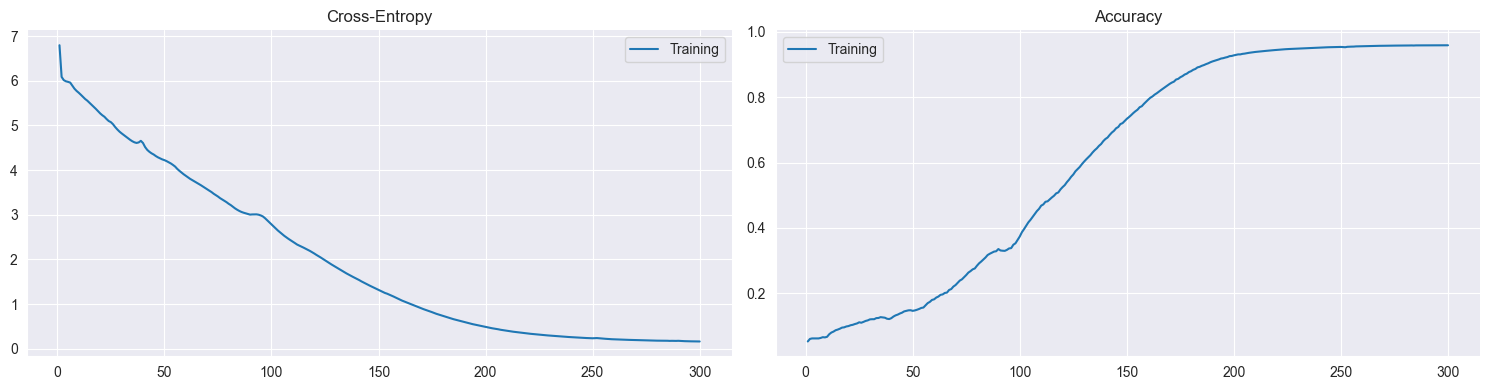

In [53]:
plot_learning_curves(df)

### Save Model

In [54]:
from pickle import dump

In [55]:
# Save the model to file
model.save('four_chapters_moby_dick_model_300_FIRAS.keras')
# Save the tokenizer
dump(tokenizer, open('four_chapters_moby_dick_tokenizer_300_FIRAS', 'wb'))

## Generating New Text

In [33]:
# Import the dependencies needed for the LSTM.
from random import randint
from pickle import load
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences

#### Test: Grab a random seed sequence

In [36]:
# Import the random module. 
import random

In [37]:
input_batch, target_batch = next(iter(dataset.batch(1)))

In [38]:
# Pick a random sequence of 26 words. 
random_pick = random.randint(10,128)
seed_text = tokenizer.sequences_to_texts([input_batch[0][random_pick].numpy()])[0]
seed_text

'money off circulation growing now money in you the drizzly to all money of purse off queequeg mouth a november one bringing and'

In [39]:
# Import the load_model method.
from tensorflow.keras.models import load_model

In [41]:
# Set the model to the saved trained 300 epoch model. 
model = load_model('four_chapters_moby_dick_model_300_FIRAS.keras')
# Set the tokenizer to the trained tokenizer from the model. 
tokenizer = load(open('four_chapters_moby_dick_tokenizer_300_FIRAS', 'rb'))

In [42]:
def preprocess(texts):
    X = np.array(tokenizer.texts_to_sequences([texts])) - 1
    # pad_encoded = pad_sequences(X, maxlen=seq_len, truncating='pre' )
    return X

In [44]:
preprocess(seed_text).shape

(1, 23)

In [45]:
np.argmax(model.predict(preprocess(seed_text), verbose=0)[0, -1:, :]) + 1

2

In [46]:
pred = model.predict(preprocess(seed_text), verbose=0)[0]

In [49]:
pred.shape

(23, 2727)

In [50]:
np.argmax(pred, axis =-1)[-1] + 1

2

In [55]:
def preprocess(texts):
    X = np.array(tokenizer.texts_to_sequences([texts])) -1
    # pad_encoded = pad_sequences(X, maxlen=seq_len, truncating='pre')
    return X
  
def next_word(model, tokenizer,
              text, num_gen_words=1, 
              randome_sampling = False,
              temperature=1):  
    '''
    Randome_Sampling : Using a categorical distribution to predict the character returned by the model
    Low temperatures results in more predictable text.
    Higher temperatures results in more surprising text.
    Experiment to find the best setting.
    '''
    input_text = text  
    output_text = []  
      
    for i in range(num_gen_words):  
        X_new = preprocess(input_text)  
        
        if randome_sampling:
            y_proba = model.predict(X_new, verbose = 0)[0, -1:, :]#first sentence, last token
            rescaled_logits = tf.math.log(y_proba) / temperature
            pred_word_ind = tf.random.categorical(rescaled_logits, num_samples=1) + 1
            pred_word = tokenizer.sequences_to_texts(pred_word_ind.numpy())[0]
        else:
            y_proba = model.predict(X_new, verbose=0)[0]  #first sentence
            pred_word_ind = np.argmax(y_proba, axis = -1) +1 
            pred_word = tokenizer.index_word[pred_word_ind[-1]]   
             
        
        input_text += ' ' + pred_word  
        output_text.append(pred_word)  
      
    return ' '.join(output_text)  
  
def generate_text(model, tokenizer, text, num_gen_words=25, temperature=1, randome_sampling=False):  
    return next_word(model, tokenizer, text, num_gen_words, randome_sampling, temperature)  
 

In [68]:
text = 'My name is Firas '

In [72]:
generate_text(model, tokenizer,text, num_gen_words = 10, temperature=2, randome_sampling = True)

'ships up them my it ever be go to upon'

In [73]:
generate_text(model, tokenizer,text, num_gen_words = 10)

'when i struck my foot against because from remorseless service'

### Extra Indexing Notes

The "+1" is added because of zero-indexing in Python. When tokenizing the text, a dictionary is created where each unique word is assigned an index. In many cases, the index starts from 1 because 0 is often reserved for padding, a special token that is used to fill in sequences to ensure they have the same length.

However, when we reverse the tokenization process (i.e., convert the tokens back to the original words), we need to shift the indices by one because Python lists are zero-indexed. This means that the first element in a list is at position 0, not 1.

So, in the tokenizer.sequences_to_texts(Y_pred + 1) statement, the "+1" is to ensure that the indices match up correctly with the original words when converting the tokens back to text.

It's worth noting that this "+1" operation is specific to the way the tokenizer was set up and how the sequences were preprocessed. If your preprocessing is different, you might not need to do this. Always make sure you understand your data and preprocessing steps.



## Explore Generating Text

In [64]:
# Choose a 26 word text string from the first four chapters of Moby Dick.
# If less than 26 the accuracy is off. 
text = """Seeing, now, that there were no curtains to the window, and that the street being very narrow,
the house opposite commanded a plain view into the room, and"""

In [65]:
# Call the generate_text function and pass in the required parameters. We set the num_gen_words =50. 
generate_text(model,tokenizer, text,50)

'being a corkscrew in javan and run away with by a years off the cape of the original iron entered nigh like a restless needle sojourning in the body of a full forty and at last was found imbedded in this dusky and on through yon what in old times'

In [67]:
generate_text(model,tokenizer, text,50, temperature=0.2, randome_sampling=True)

'being a corkscrew in javan and run away with by a years off the cape of the original iron entered nigh like a restless needle sojourning in the body of a full forty and at last was found imbedded in this dusky and on through yon what in old times'

## Check the fist four chapters of Moby Dick to determine the accuracy of the text.
---
"Seeing, now, that there were no curtains to the window, and that the
street being very narrow, the house opposite commanded a plain view
into the room, and <font color='blue'>observing more and more the indecorous figure that
Queequeg made, staving about with little else but his hat and boots
on; I begged him as well as I could, to accelerate his toilet
somewhat, and particularly to get into his pantaloons as soon as
possible.</font>"

**Question: How would we gain better accuracy for the next 50 words?**

- Increase or decrease the length of the sequence? 
- Decrease the batch size? 